In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import math


In [2]:
data1 = pd.read_csv("Data-4-30.csv",header=None).to_numpy()
data2 = pd.read_csv("Data-4-30-Daeyoo.csv",header=None).to_numpy()

In [3]:
data2.shape

(1452, 4)

In [4]:
full_data = np.append(data1,data2,axis=0)

In [5]:
full_data.shape

(3100, 4)

### Interactive plot of Z-axis and Y 

Red = Walking, Blue = Not Walking


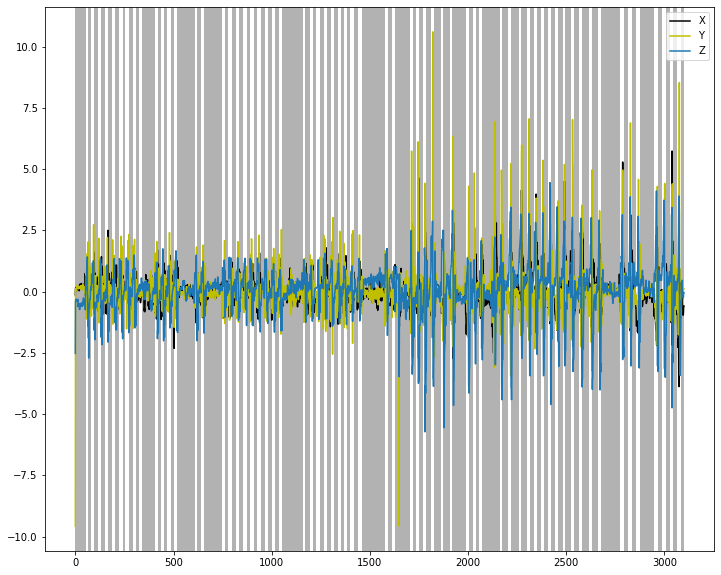

In [8]:
#%matplotlib widget

print("Red = Walking, Blue = Not Walking")
plt.figure(figsize=(12,10))

testY = full_data[:,3]


for i in range(len(full_data)):
    if(testY[i] == 1):
        plt.axvspan(i-1, i, facecolor='w', alpha=0.3)
    else:
        plt.axvspan(i-1, i, facecolor='k', alpha=0.3)


plt.plot(full_data[:,0]-np.mean(full_data[:,0]),color="k",label="X")
plt.plot(full_data[:,1]-np.mean(full_data[:,1]),color="y",label="Y")
plt.plot(full_data[:,2]-np.mean(full_data[:,2]),label="Z")
#plt.plot(full_data[:,3],label="Walking?")
plt.legend()

# Seperate dataset into samples 

In [9]:
def Prepare_Data(sampleLength,data):
    
    Y = data[:,3]
    X = data[:,0:3]
    
    
    Splitted_X = np.array(np.split(X, sampleLength))
    Splitted_Y = np.array(np.split(Y, sampleLength))
    
    
    
    finalX = np.reshape(Splitted_X,(np.ma.size(Splitted_X, axis=1),sampleLength,3))
    finalY = Splitted_Y.T
    
    
    Output = np.expand_dims(np.max(finalY,axis=1),axis=1)
    
    
    return finalX,Output

# Define Simple Vanilla Neural Network 

In [10]:
def my_model(n):

    input_1 = keras.Input(shape = (n,))

    dense_1= Dense(20,activation = 'relu')(input_1)
    dense_2= Dense(20,activation = 'relu')(dense_1)
    dense_3= Dense(2,activation = 'softmax')(dense_2)

    model = keras.Model(inputs = input_1, outputs = dense_3)
    return model

# Training

In [15]:
plot_0=[]
plot_1=[]
plot_2=[]

plot_x=[]
for i in range(1,30):
    
    
    
    print("--------------------------------------------------------------")
    print(i)
    
    
    finalX , Output = Prepare_Data(i,full_data[0: math.floor(np.ma.size(full_data,axis=0)/i)*i,:])
    
    
    X = tf.random.shuffle(finalX[:,:,0])
    Y = tf.random.shuffle(finalX[:,:,1])
    Z = tf.random.shuffle(finalX[:,:,2])
    
    model = my_model(i)
    
    model.compile(
        loss=keras.losses.SparseCategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    history_train0 = model.fit(X,Output,epochs = 10,validation_split=0.3,batch_size=16,verbose=0)
    history_train1 = model.fit(Y,Output,epochs = 10,validation_split=0.3,batch_size=16,verbose=0)
    history_train2 = model.fit(Z,Output,epochs = 10,validation_split=0.3,batch_size=16,verbose=0)
    
    plot_x.append(i)
    plot_0.append(history_train0.history['val_accuracy'][-1])
    plot_1.append(history_train1.history['val_accuracy'][-1])
    plot_2.append(history_train2.history['val_accuracy'][-1])
    
    
    
    
    

--------------------------------------------------------------
1
--------------------------------------------------------------
2
--------------------------------------------------------------
3
--------------------------------------------------------------
4
--------------------------------------------------------------
5
--------------------------------------------------------------
6
--------------------------------------------------------------
7
--------------------------------------------------------------
8
--------------------------------------------------------------
9
--------------------------------------------------------------
10
--------------------------------------------------------------
11
--------------------------------------------------------------
12
--------------------------------------------------------------
13
--------------------------------------------------------------
14
--------------------------------------------------------------
15
-------------------

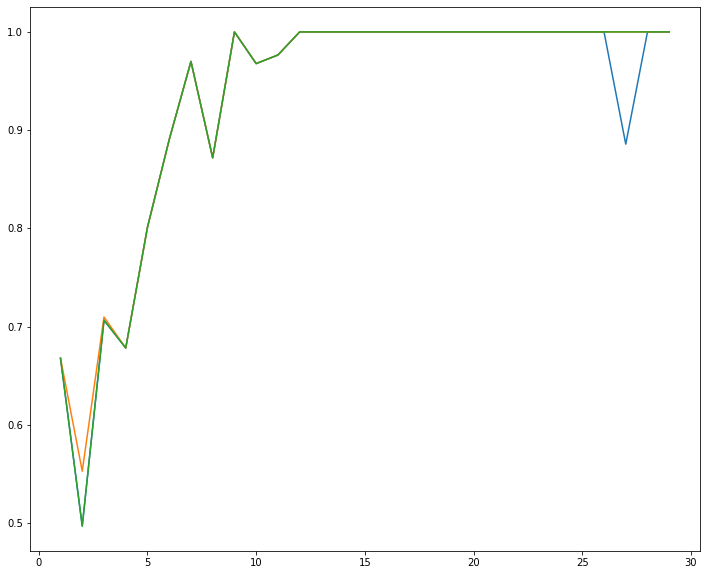

In [16]:
fig = plt.figure(figsize=(12,10))
plt.plot(plot_x,plot_0)
plt.plot(plot_x,plot_1)
plt.plot(plot_x,plot_2)